In [1]:
import scipy.io
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
#imports for LSTM
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_tweedie_deviance
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import tensorflow as tf
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import RepeatVector, TimeDistributed

In [2]:
sub1_train = scipy.io.loadmat('sub1_comp.mat')
sub1_test = scipy.io.loadmat('sub1_testlabels.mat')
sub2_train = scipy.io.loadmat('sub2_comp.mat')
sub2_test = scipy.io.loadmat('sub2_testlabels.mat')
sub3_train = scipy.io.loadmat('sub3_comp.mat')
sub3_test = scipy.io.loadmat('sub3_testlabels.mat')

In [5]:
sub1_x_train=pd.DataFrame(sub1_train['train_data'])
sub1_y_train=pd.DataFrame(sub1_train['train_dg'])
sub1_x_test=pd.DataFrame(sub1_train['test_data'])
sub1_y_test=pd.DataFrame(sub1_test['test_dg'])

sub2_x_train=pd.DataFrame(sub2_train['train_data'])
sub2_y_train=pd.DataFrame(sub2_train['train_dg'])
sub2_x_test=pd.DataFrame(sub2_train['test_data'])
sub2_y_test=pd.DataFrame(sub2_test['test_dg'])

sub3_x_train=pd.DataFrame(sub3_train['train_data'])
sub3_y_train=pd.DataFrame(sub3_train['train_dg'])
sub3_x_test=pd.DataFrame(sub3_train['test_data'])
sub3_y_test=pd.DataFrame(sub3_test['test_dg'])

In [6]:
sub3_x_train

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,1392,2132,1811,-90,2567,-493,1254,-1096,-667,426,...,1818,2280,553,4157,-1699,-475,1357,-705,-15,-1290
1,842,1850,1461,-350,2478,-679,1124,-1289,-1089,-19,...,1561,2097,310,3730,-1913,-707,1163,-897,-385,-1558
2,582,1912,1505,-237,2689,-532,1366,-961,-1035,3,...,1705,2444,501,3661,-2251,-583,1336,-549,-391,-1414
3,183,1679,1387,-458,2593,-688,1387,-832,-1125,-255,...,1559,2600,387,3425,-2537,-700,1108,-488,-596,-1576
4,-253,1145,1039,-1032,2176,-1130,1125,-1003,-1442,-864,...,1085,2396,-109,2991,-2317,-1048,373,-786,-1008,-2088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,434,2065,370,31,946,475,980,1776,1213,-748,...,854,-844,-1326,907,1462,1630,1255,187,846,1653
399996,521,2200,518,297,1073,700,922,1859,1443,-544,...,974,-682,-1192,923,760,1851,1365,432,1009,1584
399997,309,2077,492,242,895,689,753,1677,1158,-554,...,839,-853,-1382,772,692,1822,1235,402,852,1240
399998,45,1931,415,73,710,681,642,1443,711,-574,...,668,-1216,-1629,657,1274,1683,1078,336,642,950


<Axes: >

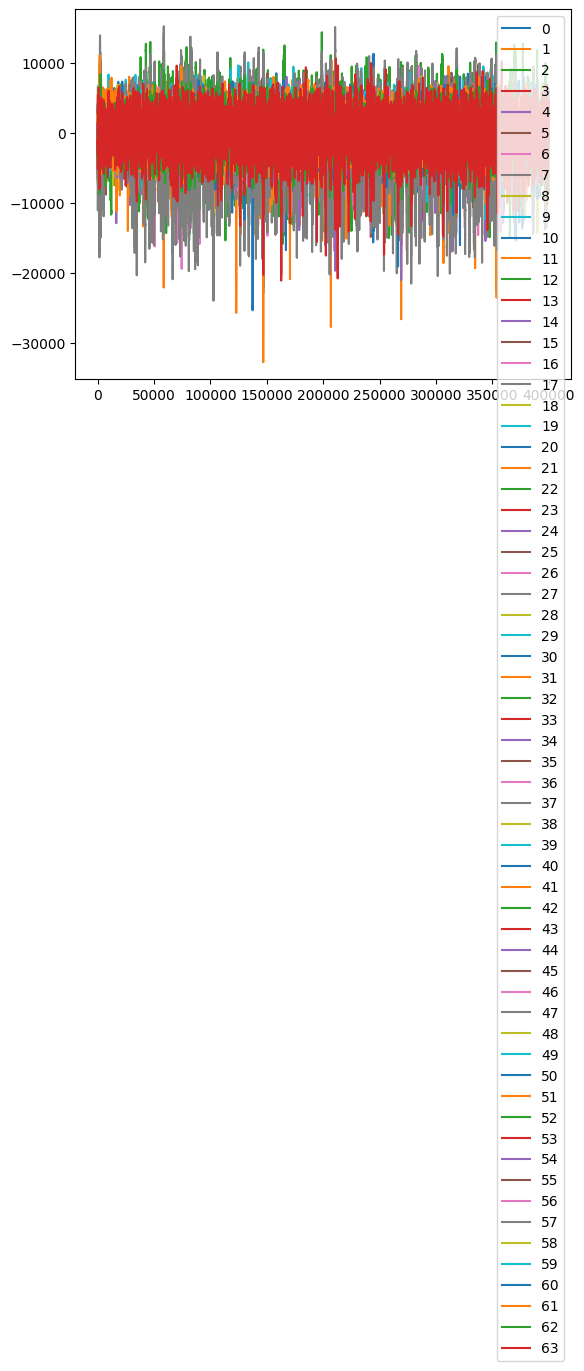

In [12]:
sub3_x_train.plot()

In [7]:
sub3_x_train_Q1 = sub3_x_train.quantile(0.25)
sub3_x_train_Q3 = sub3_x_train.quantile(0.75)
IQR = sub3_x_train_Q3 - sub3_x_train_Q1
sub3_x_train_final = sub3_x_train[~((sub3_x_train < (sub3_x_train_Q1 - 1.5 * IQR)) |(sub3_x_train > (sub3_x_train_Q3 + 1.5 * IQR))).any(axis=1)]

In [8]:
#instead of removing the outliers by IQR cap them to the IQR
sub3_x_train_final = sub3_x_train.clip(sub3_x_train_Q1 - 1.5 * IQR, sub3_x_train_Q3 + 1.5 * IQR, axis = 1)

sub3_x_train_final

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,1392.0,2132,1811,-90.0,2567,-493.0,1254.0,-1096.0,-667.0,426,...,1818.0,2280.0,553,4157.0,-1699,-475.0,1357,-705.0,-15,-1290.0
1,842.0,1850,1461,-350.0,2478,-679.0,1124.0,-1289.0,-1089.0,-19,...,1561.0,2097.0,310,3730.0,-1913,-707.0,1163,-897.0,-385,-1558.0
2,582.0,1912,1505,-237.0,2689,-532.0,1366.0,-961.0,-1035.0,3,...,1705.0,2444.0,501,3661.0,-2251,-583.0,1336,-549.0,-391,-1414.0
3,183.0,1679,1387,-458.0,2593,-688.0,1387.0,-832.0,-1125.0,-255,...,1559.0,2600.0,387,3425.0,-2537,-700.0,1108,-488.0,-596,-1576.0
4,-253.0,1145,1039,-1032.0,2176,-1130.0,1125.0,-1003.0,-1442.0,-864,...,1085.0,2396.0,-109,2991.0,-2317,-1048.0,373,-786.0,-1008,-2088.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,434.0,2065,370,31.0,946,475.0,980.0,1776.0,1213.0,-748,...,854.0,-844.0,-1326,907.0,1462,1630.0,1255,187.0,846,1653.0
399996,521.0,2200,518,297.0,1073,700.0,922.0,1859.0,1443.0,-544,...,974.0,-682.0,-1192,923.0,760,1851.0,1365,432.0,1009,1584.0
399997,309.0,2077,492,242.0,895,689.0,753.0,1677.0,1158.0,-554,...,839.0,-853.0,-1382,772.0,692,1822.0,1235,402.0,852,1240.0
399998,45.0,1931,415,73.0,710,681.0,642.0,1443.0,711.0,-574,...,668.0,-1216.0,-1629,657.0,1274,1683.0,1078,336.0,642,950.0


<Axes: >

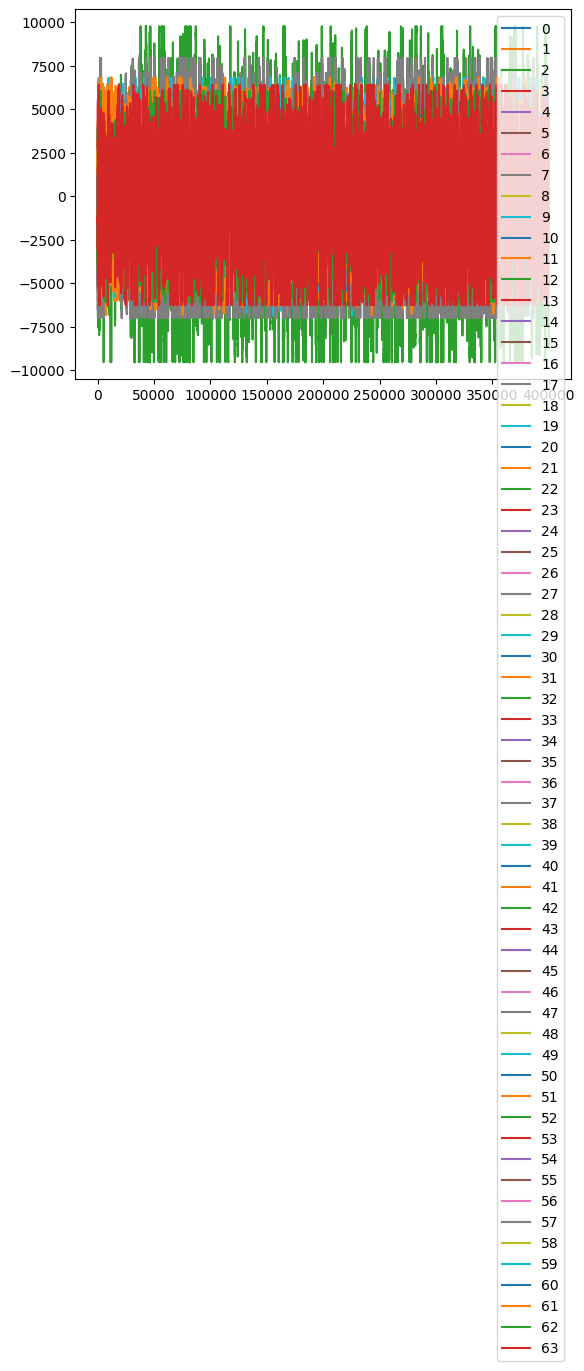

In [9]:
sub3_x_train_final.plot()

In [9]:
sub3_x_train_final.describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,400000.000000,400000.000000,400000.000000,400000.000000,400000.00000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,...,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.00000,400000.000000,400000.000000,400000.000000,400000.000000
mean,15.613074,1.192112,8.873033,0.744685,7.54822,5.197690,4.371568,3.614124,23.522405,9.386920,...,41.570924,13.647774,14.260067,269.135264,3.382808,5.21380,9.470285,5.189457,2.958820,33.232461
std,1612.123454,1405.565000,1553.440933,1465.363247,1707.87160,1449.278044,1568.318078,1394.172294,2059.508063,1648.414587,...,1650.178994,2202.981223,1731.084053,3329.260142,1427.936474,1436.99651,1742.586243,2281.134703,2209.495342,2419.601646
min,-4251.500000,-3712.000000,-4105.000000,-3955.500000,-4514.00000,-3929.500000,-4155.500000,-3735.500000,-5344.500000,-4333.000000,...,-4120.500000,-5904.500000,-4542.000000,-6985.500000,-3840.000000,-3836.50000,-4645.000000,-6824.500000,-6078.000000,-6252.500000
25%,-1037.000000,-916.000000,-1000.000000,-984.000000,-1106.00000,-979.000000,-1031.000000,-923.000000,-1272.000000,-1066.000000,...,-966.000000,-1418.000000,-1095.000000,-1380.000000,-954.000000,-949.00000,-1150.000000,-1702.000000,-1521.000000,-1502.000000
50%,40.000000,25.000000,67.000000,6.000000,38.00000,1.000000,18.000000,30.000000,103.000000,34.000000,...,105.000000,139.000000,110.000000,570.000000,11.000000,24.00000,13.000000,-161.000000,-53.000000,118.000000
75%,1106.000000,948.000000,1070.000000,997.000000,1166.00000,988.000000,1052.000000,952.000000,1443.000000,1112.000000,...,1137.000000,1573.000000,1203.000000,2357.000000,970.000000,976.00000,1180.000000,1713.000000,1517.000000,1665.000000
max,4320.500000,3744.000000,4175.000000,3968.500000,4574.00000,3938.500000,4176.500000,3764.500000,5515.500000,4379.000000,...,4291.500000,6059.500000,4650.000000,7962.500000,3856.000000,3863.50000,4675.000000,6835.500000,6074.000000,6415.500000


In [10]:
#do the same with the test data
sub3_x_test_Q1 = sub3_x_test.quantile(0.25)
sub3_x_test_Q3 = sub3_x_test.quantile(0.75)
IQR = sub3_x_test_Q3 - sub3_x_test_Q1
sub3_x_test_final = sub3_x_test[~((sub3_x_test < (sub3_x_test_Q1 - 1.5 * IQR)) |(sub3_x_test > (sub3_x_test_Q3 + 1.5 * IQR))).any(axis=1)]
#clip outliers
sub3_x_test_final = sub3_x_test.clip(sub3_x_test_Q1 - 1.5 * IQR, sub3_x_test_Q3 + 1.5 * IQR, axis = 1)
sub3_x_test_final

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,167.0,2488,751,582,1035.0,1391.0,1084.0,1737.0,952.0,192,...,1227,-1214,-1139.0,1031,1857.0,2142.0,1689.0,1254.0,892,1689
1,-133.0,2371,532,527,802.0,1258.0,880.0,1508.0,734.0,164,...,1116,-1598,-1367.0,839,1762.0,2055.0,1627.0,1241.0,486,1683
2,-714.0,1957,23,162,179.0,769.0,269.0,1019.0,216.0,-238,...,639,-2157,-1993.0,327,1467.0,1658.0,1141.0,789.0,-332,1241
3,-917.0,1977,-129,168,-247.0,621.0,-77.0,918.0,99.0,-341,...,497,-2224,-2244.0,98,921.0,1589.0,960.0,741.0,-792,1049
4,-724.0,2465,44,532,-287.0,910.0,23.0,1123.0,337.0,-123,...,749,-1959,-2101.0,257,577.0,1847.0,1132.0,1145.0,-868,1206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,-275.0,647,-1743,328,905.0,934.0,344.0,1056.0,-948.0,-2399,...,-481,-2679,-1754.0,-1408,-1496.0,2124.0,-2344.0,-3477.0,330,682
199996,-324.0,786,-1749,538,819.0,949.0,484.0,1280.0,-787.0,-2224,...,-420,-2407,-1672.0,-1386,-1677.0,2407.0,-2179.0,-3311.0,579,787
199997,-311.0,1045,-1718,791,766.0,991.0,565.0,1622.0,-527.0,-1982,...,-254,-1945,-1432.0,-1352,-2225.0,2740.0,-1953.0,-3047.0,888,981
199998,-487.0,1020,-1896,739,525.0,718.0,336.0,1632.0,-647.0,-2011,...,-356,-1730,-1446.0,-1526,-2595.0,2743.0,-2080.0,-3125.0,862,941


<Axes: >

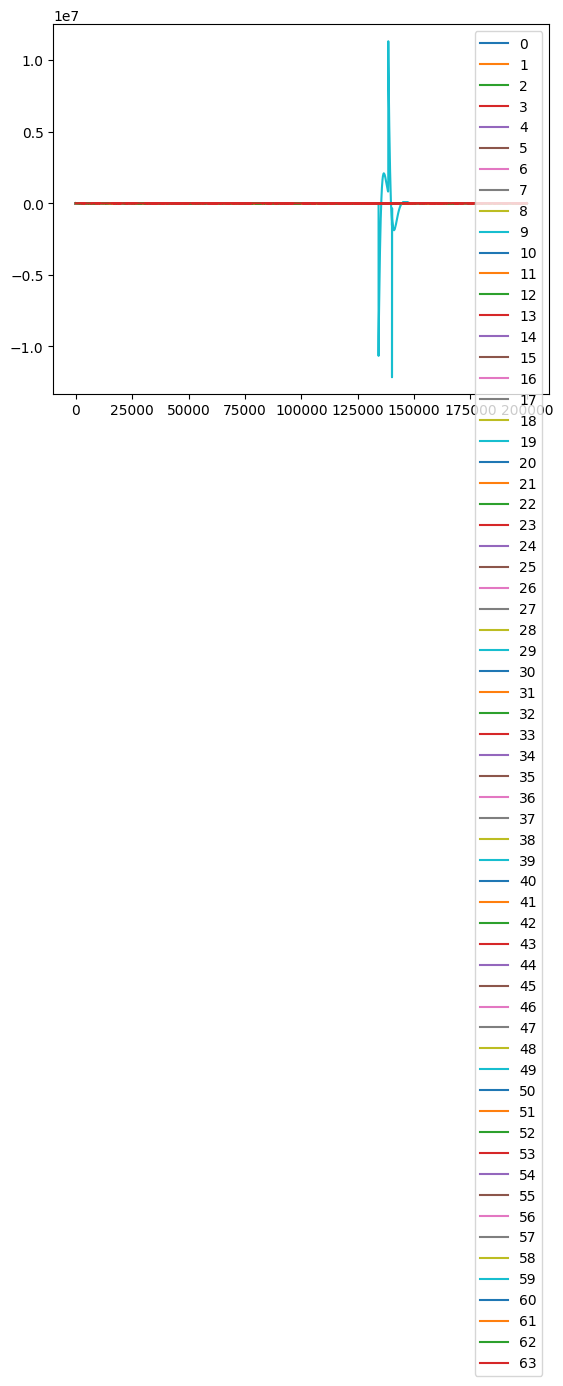

In [15]:
sub3_x_test.plot()

<Axes: >

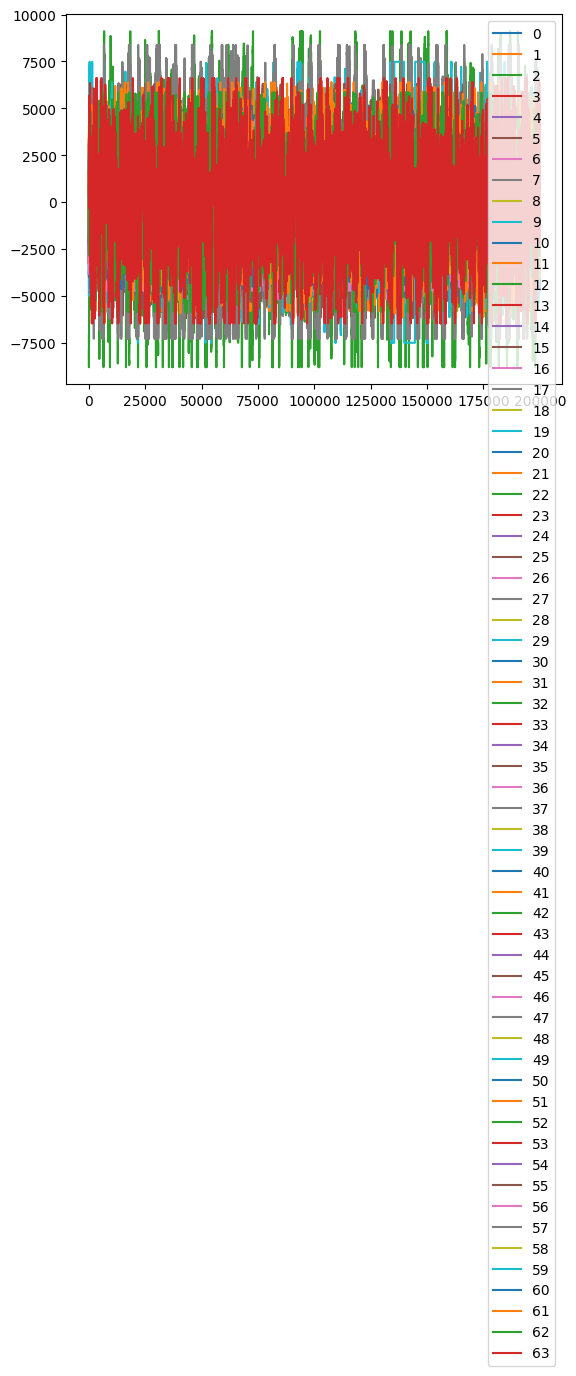

In [16]:
sub3_x_test_final.plot()

In [11]:
sub3_y_test

,0,1,2,3,4
0,-0.128054,0.363715,-0.188113,0.037329,0.353174
1,-0.127698,0.366526,-0.186823,0.043591,0.361917
2,-0.127338,0.369386,-0.185515,0.049967,0.370876
3,-0.126976,0.372297,-0.184190,0.056457,0.380051
4,-0.126610,0.375258,-0.182847,0.063061,0.389445
...,...,...,...,...,...
199995,0.149179,-0.267619,0.042094,0.549439,0.170671
199996,0.147151,-0.262582,0.042869,0.545693,0.170275
199997,0.145111,-0.257577,0.043591,0.541763,0.169794
199998,0.143062,-0.252606,0.044262,0.537656,0.169230


In [12]:
#train a linear regression model on x_train_final and y_train and then find correlation with final y_test
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(sub3_x_train_final, sub3_y_train)
y_pred = regressor.predict(sub3_x_test_final)
y_pred_df=pd.DataFrame(y_pred)
y_pred_df 

,0,1,2,3,4
0,0.262570,0.296523,-0.069467,0.227237,0.339664
1,0.233872,0.265839,-0.087122,0.208886,0.323894
2,0.187970,0.184242,-0.120972,0.141641,0.260424
3,0.158914,0.187020,-0.120505,0.123054,0.246645
4,0.135022,0.251300,-0.097692,0.148177,0.279486
...,...,...,...,...,...
199995,0.054493,0.192830,-0.142110,-0.043183,0.043339
199996,0.121946,0.253140,-0.124936,0.003228,0.078163
199997,0.203210,0.357672,-0.078627,0.098967,0.139514
199998,0.233175,0.367790,-0.068916,0.128501,0.137599


In [13]:
#find correlation between y_pred and y_test
from scipy.stats import pearsonr

array1 = np.array(sub3_y_test)
array2 = np.array(y_pred_df)

corr, _ = pearsonr(array1.flatten(), array2.flatten())
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.234
